# Airline Passenger Satisfaction 
- Final Presentation 
    - Maeve O'Toole and Lindsay Spratt

# About the Data...
BIG QUESTION: What factors lead a passenger to be satified with an airline?

About: This dataset contains an airline passenger satisfaction survey... what factors are highly correlated to a satisfied, or dissatisfied passenger? 

23 columns in the dataset... 

1. Gender: Gender of the passengers (Female, Male)

2. Customer Type: The customer type (Loyal customer, disloyal customer)

3. Age: The actual age of the passengers

4. Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

5. Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

6. Flight distance: The flight distance of this journey

7. Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

8. Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

9. Ease of Online booking: Satisfaction level of online booking

10. Gate location: Satisfaction level of Gate location

11. Food and drink: Satisfaction level of Food and drink

12. Online boarding: Satisfaction level of online boarding

13. Seat comfort: Satisfaction level of Seat comfort

14. Inflight entertainment: Satisfaction level of inflight entertainment

15. On-board service: Satisfaction level of On-board service

16. Leg room service: Satisfaction level of Leg room service

17. Baggage handling: Satisfaction level of baggage handling

18. Check-in service: Satisfaction level of Check-in service

19. Inflight service: Satisfaction level of inflight service

20. Cleanliness: Satisfaction level of Cleanliness

21. Departure Delay in Minutes: Minutes delayed when departure

22. Arrival Delay in Minutes: Minutes delayed when Arrival

23. Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
from sklearn.cluster import KMeans

In [2]:
# import and read the file
# https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?resource=download
    # this dataset on kaggle comes with test and train data

path = 'airline_test.csv'
data = pd.read_csv(path)

data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [3]:
data.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied
25975,25975,34799,Female,Loyal Customer,42,Personal Travel,Eco,264,2,5,...,1,1,2,1,1,1,1,0,0.0,neutral or dissatisfied


In [4]:
data.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [5]:
len(data)

25976

In [6]:
data.shape

(25976, 25)

In [7]:
# what data types are we looking at...
    # integers - (19 columns)
    # objects - (5 columns)
    # floats - (1 column)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [8]:
# get the statistics on the integer columns...
data.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,12987.500000,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,7498.769632,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,6493.750000,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,12987.500000,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,19481.250000,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In [9]:
# can we explore more about the object columns
data.describe( include = 'object' )

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,25976,25976,25976,25976,25976
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,13172,21177,18038,12495,14573


In [74]:
# show the correlation between features 
data.corr()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Unnamed: 0,1.000000,0.006946,-0.007964,-0.002470,-0.003085,-0.003962,-0.002011,-0.001360,-0.010858,-0.000254,-0.005602,-0.012927,0.001180,-0.004194,0.000349,0.002773,-0.008069,-0.005058,-0.005948,-0.002974
id,0.006946,1.000000,0.010211,0.095335,-0.030303,-0.002502,0.010389,0.001843,-0.006789,0.055767,0.049212,-0.001078,0.056544,0.041921,0.073085,0.079521,0.076587,0.020411,-0.009884,-0.029090
Age,-0.007964,0.010211,1.000000,0.099409,0.009242,0.032449,0.013565,0.003308,0.023841,0.202058,0.154507,0.068998,0.054977,0.033299,-0.049863,0.025388,-0.059083,0.048418,-0.004334,-0.007400
Flight Distance,-0.002470,0.095335,0.099409,1.000000,0.005007,-0.014401,0.062989,0.008410,0.057322,0.214629,0.158957,0.137538,0.117880,0.136995,0.071549,0.075720,0.066355,0.105578,0.003446,0.000131
Inflight wifi service,-0.003085,-0.030303,0.009242,0.005007,1.000000,0.349137,0.710684,0.347790,0.122306,0.459366,0.116991,0.201782,0.113658,0.159699,0.118199,0.046046,0.108419,0.125768,-0.010078,-0.012277
Departure/Arrival time convenient,-0.003962,-0.002502,0.032449,-0.014401,0.349137,1.000000,0.440230,0.458439,-0.016006,0.080937,-0.001926,-0.022326,0.060982,0.003373,0.065684,0.082461,0.067804,-0.007670,-0.000238,-0.001345
Ease of Online booking,-0.002011,0.010389,0.013565,0.062989,0.710684,0.440230,1.000000,0.465514,0.025141,0.408003,0.022811,0.044715,0.039988,0.116754,0.040685,-0.000108,0.035769,0.010974,-0.001062,-0.003161
Gate location,-0.001360,0.001843,0.003308,0.008410,0.347790,0.458439,0.465514,1.000000,-0.009694,0.006993,-0.000721,-0.000340,-0.031606,-0.002428,-0.004395,-0.054954,-0.005129,-0.014195,0.008039,0.007776
Food and drink,-0.010858,-0.006789,0.023841,0.057322,0.122306,-0.016006,0.025141,-0.009694,1.000000,0.229601,0.580970,0.627265,0.050688,0.035870,0.037617,0.076775,0.039992,0.659253,-0.025957,-0.028309
Online boarding,-0.000254,0.055767,0.202058,0.214629,0.459366,0.080937,0.408003,0.006993,0.229601,1.000000,0.415414,0.279391,0.149430,0.120354,0.084583,0.203309,0.071972,0.320912,-0.021037,-0.025875


/Users/maeveotoole/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


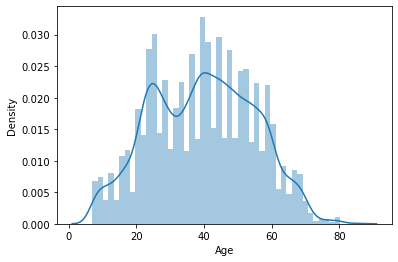

In [78]:
# we want to look more into the age distribution 
    # see what ages mostly travel and what ages would care to fill out a survey
_ = sns.distplot( data["Age"] )
    # most range from 20 to 60

In [75]:
# split the data based on age
    # we can name this age category and cut the data to have all people fall into 1 of 4 groups
data["Age_category"] = pd.cut(data.Age, [ 0, 14, 25, 60, np.inf ], labels = ['children','youth','adults',"elderly"])

In [73]:
## Which Category of male and female are customers types
data.groupby( ["Gender", "Age_category"] )["Customer Type"].value_counts()

Gender  Age_category  Customer Type    
Female  children      Loyal Customer        537
                      disloyal Customer      67
        youth         Loyal Customer       1243
                      disloyal Customer    1017
        adults        Loyal Customer       7842
                      disloyal Customer    1432
        elderly       Loyal Customer        976
                      disloyal Customer      58
Male    children      Loyal Customer        544
                      disloyal Customer      82
        youth         Loyal Customer       1178
                      disloyal Customer     892
        adults        Loyal Customer       7858
                      disloyal Customer    1206
        elderly       Loyal Customer        999
                      disloyal Customer      45
Name: Customer Type, dtype: int64

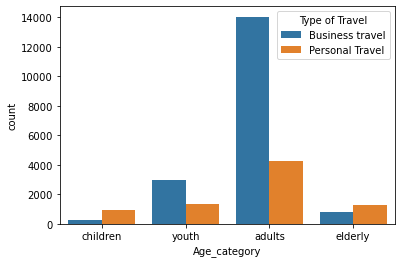

In [72]:
# plot the distribution of people based on their age category, split by the type of travel
    # adults and youth mostly travel for business
    # elderly and children mostly travel for person
_ = sns.countplot(x = "Age_category", hue = "Type of Travel", data = data )

In [71]:
## what were the average, min and max age group travelling 
data["Age"].agg(["mean","min","max"]).to_frame()
    # mean age ~ 40
    # min age = 7
    # max age = 85

,Age
mean,39.620958
min,7.000000
max,85.000000


In [10]:
data.groupby('Customer Type').count()

,Unnamed: 0,id,Gender,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Customer Type,,,,,,,,,,,,,,,,,,,,,
Loyal Customer,21177,21177,21177,21177,21177,21177,21177,21177,21177,21177,...,21177,21177,21177,21177,21177,21177,21177,21177,21111,21177
disloyal Customer,4799,4799,4799,4799,4799,4799,4799,4799,4799,4799,...,4799,4799,4799,4799,4799,4799,4799,4799,4782,4799


In [11]:
# group by the types of travel that a person specified 
data.groupby('Type of Travel').count()

,Unnamed: 0,id,Gender,Customer Type,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Type of Travel,,,,,,,,,,,,,,,,,,,,,
Business travel,18038,18038,18038,18038,18038,18038,18038,18038,18038,18038,...,18038,18038,18038,18038,18038,18038,18038,18038,17980,18038
Personal Travel,7938,7938,7938,7938,7938,7938,7938,7938,7938,7938,...,7938,7938,7938,7938,7938,7938,7938,7938,7913,7938


In [12]:
# group by the class of the airline (business, economy, or economy plus)
data.groupby('Class').count()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Class,,,,,,,,,,,,,,,,,,,,,
Business,12495,12495,12495,12495,12495,12495,12495,12495,12495,12495,...,12495,12495,12495,12495,12495,12495,12495,12495,12457,12495
Eco,11564,11564,11564,11564,11564,11564,11564,11564,11564,11564,...,11564,11564,11564,11564,11564,11564,11564,11564,11524,11564
Eco Plus,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917,...,1917,1917,1917,1917,1917,1917,1917,1917,1912,1917


In [13]:
# need to change the loyal vs. disloyal data to numeric to visualize it 
    # just wanted to put this into numeric data for later 
numeric_customer_type = pd.get_dummies(data['Customer Type'])
numeric_customer_type.head()

,Loyal Customer,disloyal Customer
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


# Pie Chart breakdown of the Satisfaction level of certain variables...
Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

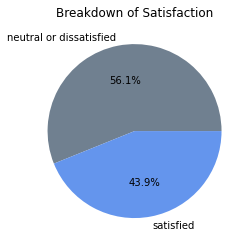

In [14]:
loyalty = data['satisfaction'].value_counts()
colors = ('slategrey', 'cornflowerblue', 'lightskyblue')
plt.pie(loyalty, colors = colors, labels = loyalty.index, autopct = '%1.1f%%')
plt.title("Breakdown of Satisfaction")
plt.savefig
plt.show()

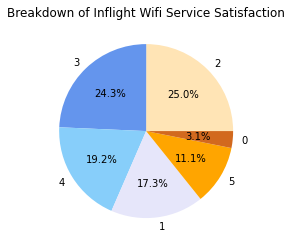

In [15]:
wifi = data['Inflight wifi service'].value_counts()
colors = ('moccasin', 'cornflowerblue', 'lightskyblue', 'lavender', 'orange', 'chocolate')
plt.pie(wifi, colors = colors, labels = wifi.index, autopct = '%1.1f%%')
plt.title("Breakdown of Inflight Wifi Service Satisfaction")
#plt.legend(loc="upper right")
plt.show()

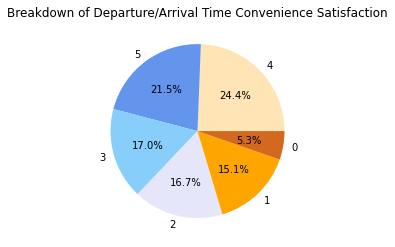

In [16]:
time_conv = data['Departure/Arrival time convenient'].value_counts()
colors = ('moccasin', 'cornflowerblue', 'lightskyblue', 'lavender', 'orange', 'chocolate')
plt.pie(time_conv, colors = colors, labels = time_conv.index, autopct = '%1.1f%%')
plt.title("Breakdown of Departure/Arrival Time Convenience Satisfaction")
#plt.legend(loc="upper right")
plt.show()

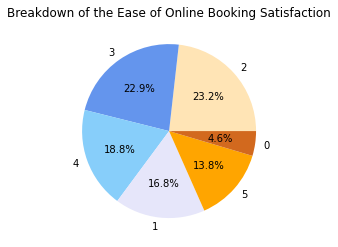

In [17]:
online_booking_ease = data['Ease of Online booking'].value_counts()
colors = ('moccasin', 'cornflowerblue', 'lightskyblue', 'lavender', 'orange', 'chocolate')
plt.pie(online_booking_ease, colors = colors, labels = online_booking_ease.index, autopct = '%1.1f%%')
plt.title("Breakdown of the Ease of Online Booking Satisfaction")
#plt.legend(loc="upper right")
plt.show()

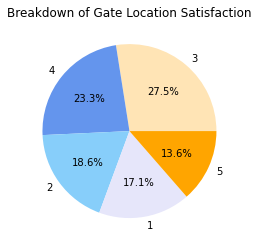

In [18]:
gate_loc = data['Gate location'].value_counts()
colors = ('moccasin', 'cornflowerblue', 'lightskyblue', 'lavender', 'orange', 'chocolate')
plt.pie(gate_loc, colors = colors, labels = gate_loc.index, autopct = '%1.1f%%')
plt.title("Breakdown of Gate Location Satisfaction")
#plt.legend(loc="upper right")
plt.show()

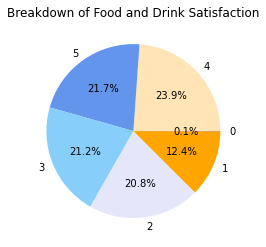

In [19]:
food_drink = data['Food and drink'].value_counts()
colors = ('moccasin', 'cornflowerblue', 'lightskyblue', 'lavender', 'orange', 'chocolate')
plt.pie(food_drink, colors = colors, labels = food_drink.index, autopct = '%1.1f%%')
plt.title("Breakdown of Food and Drink Satisfaction")
#plt.legend(loc="upper right")
plt.show()

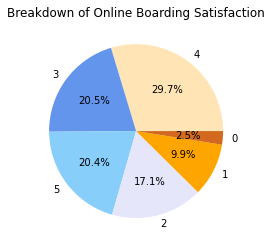

In [20]:
online_boarding = data['Online boarding'].value_counts()
colors = ('moccasin', 'cornflowerblue', 'lightskyblue', 'lavender', 'orange', 'chocolate')
plt.pie(online_boarding, colors = colors, labels = online_boarding.index, autopct = '%1.1f%%')
plt.title("Breakdown of Online Boarding Satisfaction")
#plt.legend(loc="upper right")
plt.show()

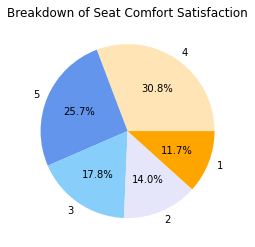

In [21]:
seat_comfort = data['Seat comfort'].value_counts()
colors = ('moccasin', 'cornflowerblue', 'lightskyblue', 'lavender', 'orange', 'chocolate')
plt.pie(seat_comfort, colors = colors, labels = seat_comfort.index, autopct = '%1.1f%%')
plt.title("Breakdown of Seat Comfort Satisfaction")
#plt.legend(loc="upper right")
plt.show()

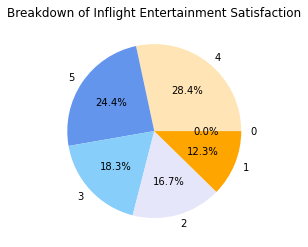

In [22]:
inflight_entertainment = data['Inflight entertainment'].value_counts()
colors = ('moccasin', 'cornflowerblue', 'lightskyblue', 'lavender', 'orange', 'chocolate')
plt.pie(inflight_entertainment, colors = colors, labels = inflight_entertainment.index, autopct = '%1.1f%%')
plt.title("Breakdown of Inflight Entertainment Satisfaction")
#plt.legend(loc="upper right")
plt.show()

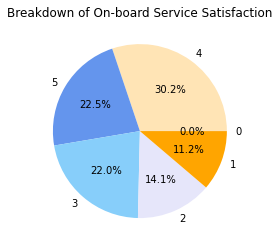

In [23]:
onboard_service = data['On-board service'].value_counts()
colors = ('moccasin', 'cornflowerblue', 'lightskyblue', 'lavender', 'orange', 'chocolate')
plt.pie(onboard_service, colors = colors, labels = onboard_service.index, autopct = '%1.1f%%')
plt.title("Breakdown of On-board Service Satisfaction")
#plt.legend(loc="upper right")
plt.show()

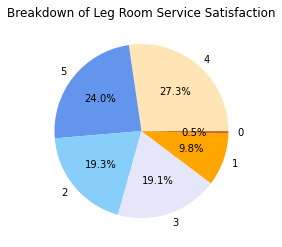

In [24]:
leg_room = data['Leg room service'].value_counts()
colors = ('moccasin', 'cornflowerblue', 'lightskyblue', 'lavender', 'orange', 'chocolate')
plt.pie(leg_room, colors = colors, labels = leg_room.index, autopct = '%1.1f%%')
plt.title("Breakdown of Leg Room Service Satisfaction")
#plt.legend(loc="upper right")
plt.show()

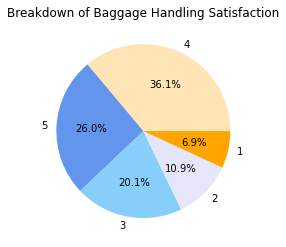

In [25]:
bag_handling = data['Baggage handling'].value_counts()
colors = ('moccasin', 'cornflowerblue', 'lightskyblue', 'lavender', 'orange', 'chocolate')
plt.pie(bag_handling, colors = colors, labels = bag_handling.index, autopct = '%1.1f%%')
plt.title("Breakdown of Baggage Handling Satisfaction")
#plt.legend(loc="upper right")
plt.show()

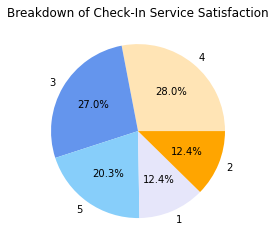

In [26]:
checkin = data['Checkin service'].value_counts()
colors = ('moccasin', 'cornflowerblue', 'lightskyblue', 'lavender', 'orange', 'chocolate')
plt.pie(checkin, colors = colors, labels = checkin.index, autopct = '%1.1f%%')
plt.title("Breakdown of Check-In Service Satisfaction")
#plt.legend(loc="upper right")
plt.show()

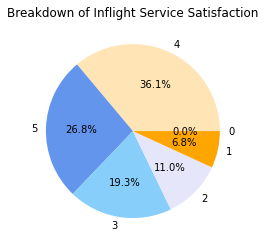

In [27]:
inflight_service = data['Inflight service'].value_counts()
colors = ('moccasin', 'cornflowerblue', 'lightskyblue', 'lavender', 'orange', 'chocolate')
plt.pie(inflight_service, colors = colors, labels = inflight_service.index, autopct = '%1.1f%%')
plt.title("Breakdown of Inflight Service Satisfaction")
#plt.legend(loc="upper right")
plt.show()

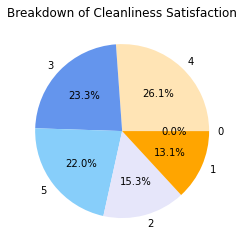

In [28]:
cleanliness = data['Cleanliness'].value_counts()
colors = ('moccasin', 'cornflowerblue', 'lightskyblue', 'lavender', 'orange', 'chocolate')
plt.pie(cleanliness, colors = colors, labels = cleanliness.index, autopct = '%1.1f%%')
plt.title("Breakdown of Cleanliness Satisfaction")
#plt.legend(loc="upper right")
plt.show()

Age
7     AxesSubplot(0.125,0.125;0.775x0.755)
8     AxesSubplot(0.125,0.125;0.775x0.755)
9     AxesSubplot(0.125,0.125;0.775x0.755)
10    AxesSubplot(0.125,0.125;0.775x0.755)
11    AxesSubplot(0.125,0.125;0.775x0.755)
                      ...                 
77    AxesSubplot(0.125,0.125;0.775x0.755)
78    AxesSubplot(0.125,0.125;0.775x0.755)
79    AxesSubplot(0.125,0.125;0.775x0.755)
80    AxesSubplot(0.125,0.125;0.775x0.755)
85    AxesSubplot(0.125,0.125;0.775x0.755)
Name: satisfaction, Length: 75, dtype: object

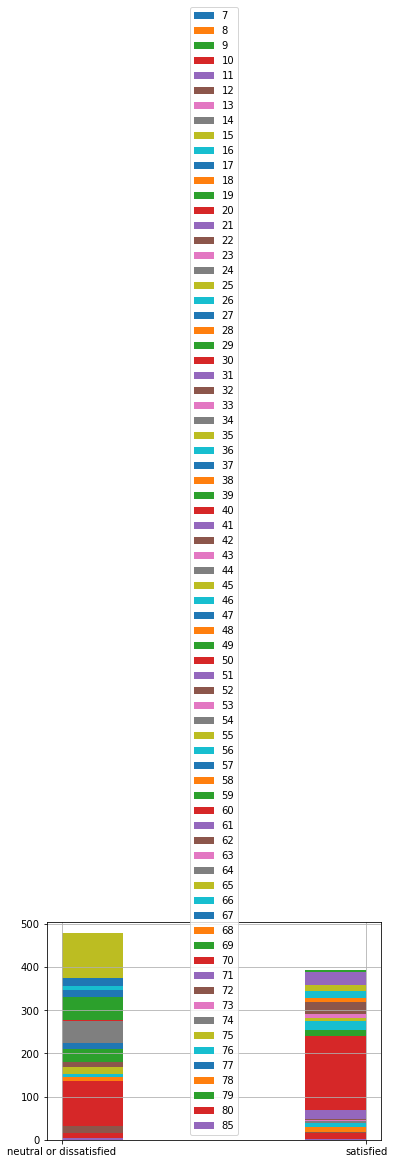

In [45]:
# group by the age and satisfaction level at each age 
data.groupby("Age")['satisfaction'].hist( bins = 5, legend = True )

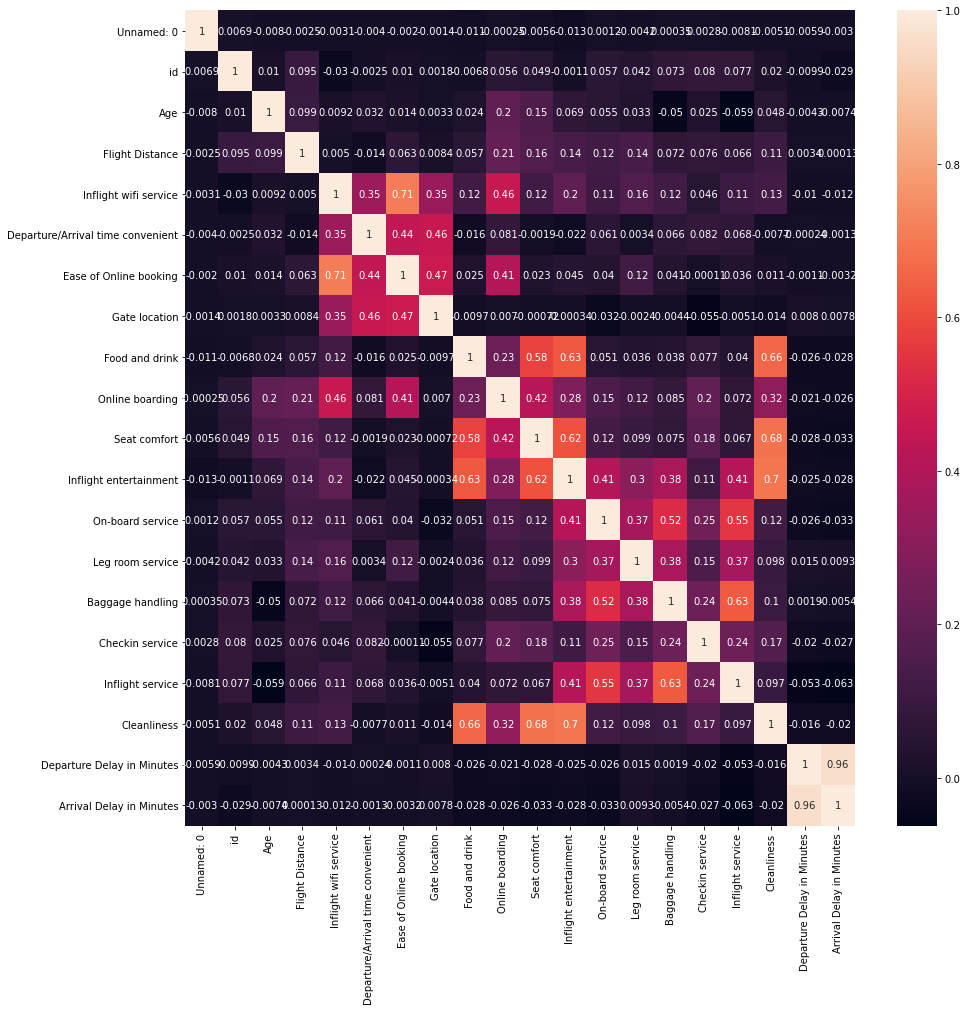

In [67]:
# heat map of all features
plt.figure( figsize = (15,15) )
sns.heatmap( data.corr(), annot = True );